# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#eliminar duplicados
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
#revisar supuestos para modelo de regresion lineal
#primero factorizamos las variables categoricas

df["sex"] = pd.factorize(df["sex"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
df["region"] = pd.factorize(df["region"])[0]

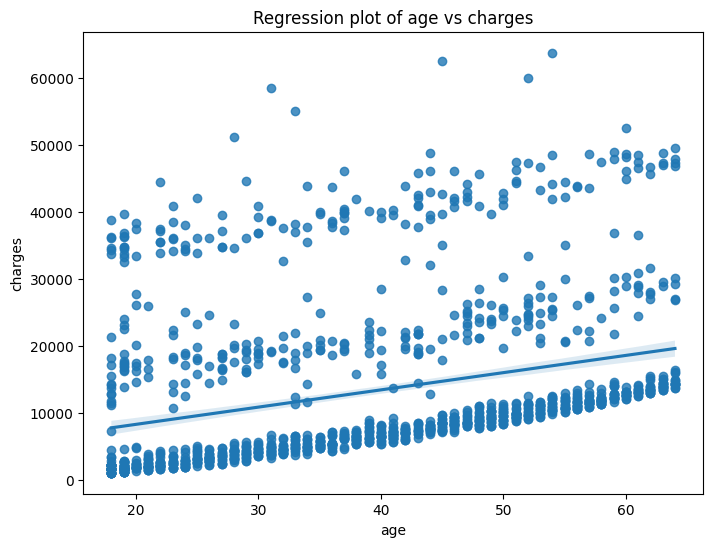

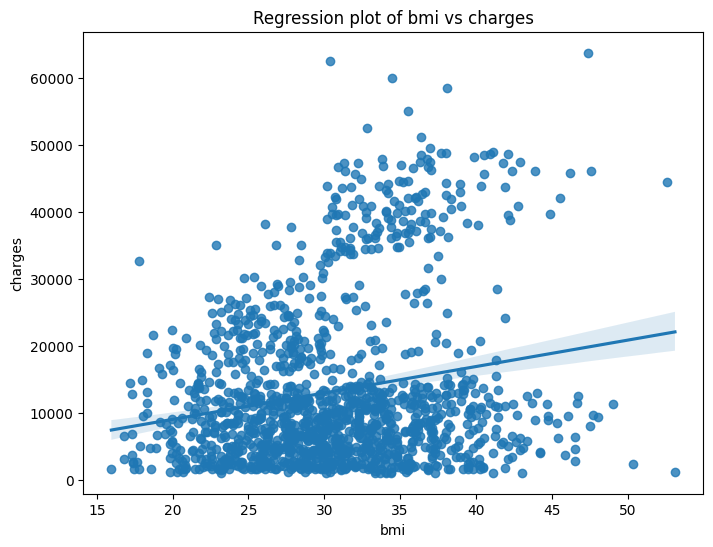

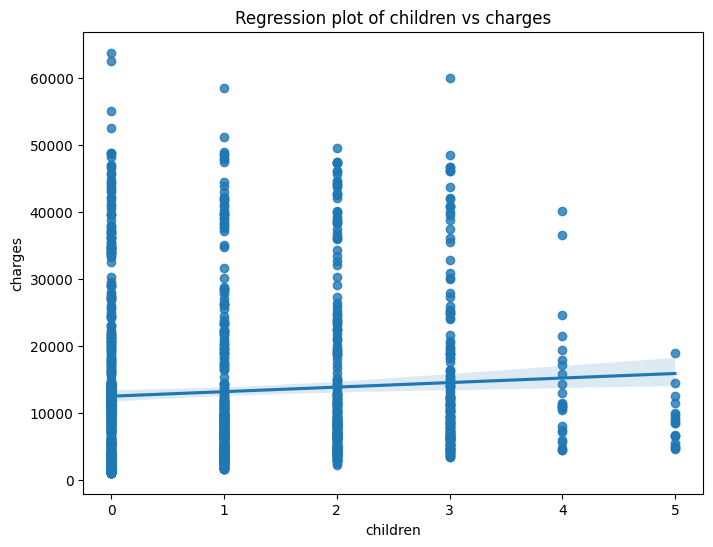

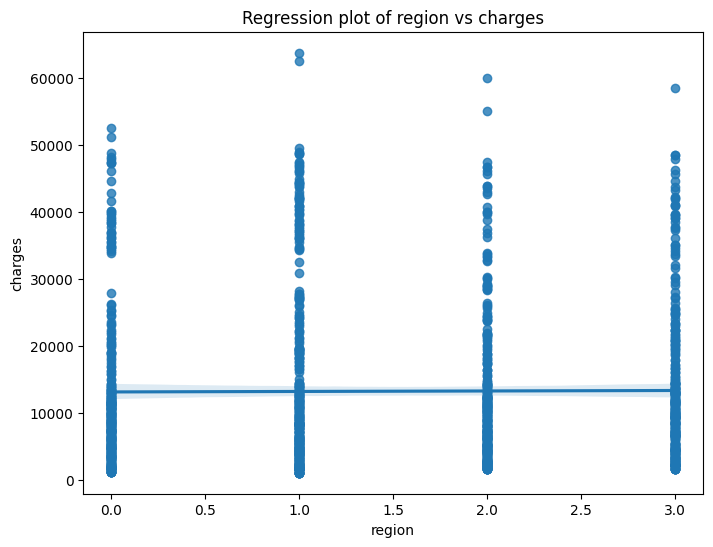

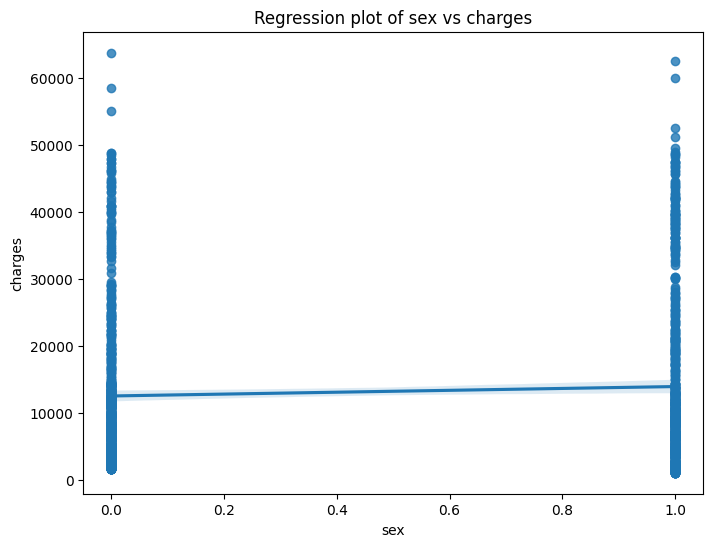

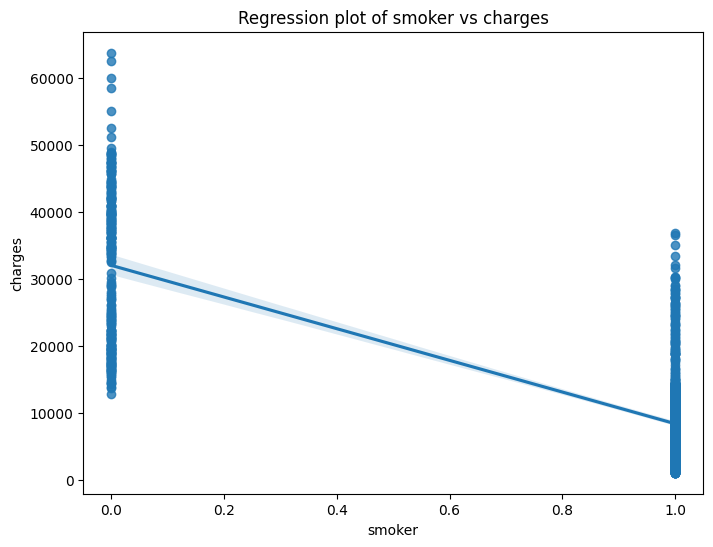

In [6]:
# Regplot para cada variable independiente vs variable objetivo

import matplotlib.pyplot as plt
import seaborn as sns
objetivo = 'charges'
independent_vars = df.columns.difference([objetivo])

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[var], y=df[objetivo])
    plt.title(f'Regression plot of {var} vs {objetivo}')
    plt.show()

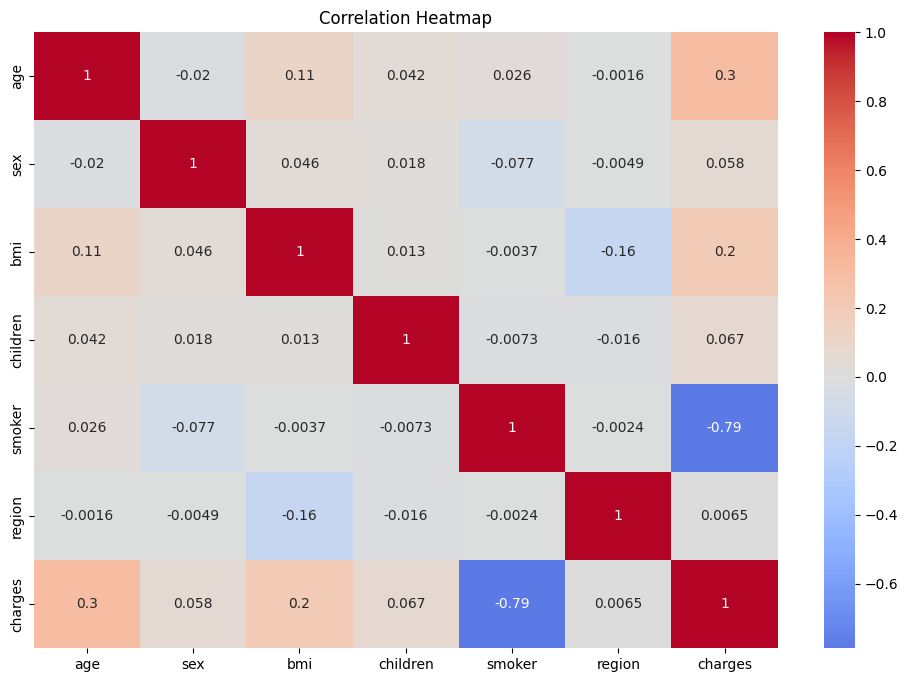

In [7]:
# Heatmap de correlaciones
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

se observa mayor correlacion entre charges y age, bmi y smoker

In [10]:
#normalizar variables independientes

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_para_normalizar = ["age","sex","bmi","children","smoker","region"]
col_escaladas = scaler.fit_transform(df[columnas_para_normalizar])

df_escalado = pd.DataFrame(col_escaladas, columns=["age","sex","bmi","children","smoker","region"])
df_escalado['charges'] = df['charges'].values

df_escalado.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,16884.92400
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,1725.55230
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,4449.46200
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,21984.47061
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,3866.85520


In [11]:
#dividir en train y test
from sklearn.model_selection import train_test_split

X = df_escalado.drop("charges", axis=1)
y = df_escalado["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f"intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")
print(columnas_para_normalizar)

intercepto: 20758.58438990583
Coeficientes: [ 11443.14728148    -99.69539417  11619.67819122   2670.60438271
 -23052.15275173    712.87544245]
['age', 'sex', 'bmi', 'children', 'smoker', 'region']


confirmamos que age, bmi y smoker son los coeficientes con mayor valor absoluto

In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[ 8.08045019e+03  5.59287112e+03  1.43782987e+04  3.17318195e+04
  9.15835694e+03  1.33610143e+04  3.02576553e+04  1.30864736e+03
  1.08494254e+04  1.13755485e+04  1.04822214e+04  3.31558608e+04
  3.09123841e+04  1.71688443e+04  1.06361393e+04  9.37424715e+03
  3.96524338e+03  3.19229863e+04  3.08468457e+03  5.47544373e+03
  3.76844305e+03  3.01552667e+04  1.50768984e+04  3.02746510e+04
  3.10830548e+04  5.52001772e+03  3.56655758e+04  3.63713163e+04
  1.12979802e+04  1.40664742e+04  6.37519963e+03  1.29381095e+04
  6.79284837e+02  1.19476924e+04  3.97832706e+04  1.21517558e+04
  4.57717842e+03  4.01652351e+03  3.11475453e+04  9.22301501e+03
  6.86852604e+03  3.00358113e+04  3.49732855e+04  1.21709787e+04
  7.46262777e+03  3.27014535e+03  6.02195905e+03  8.81742438e+03
  4.32171874e+03  9.25718479e+03  6.82679737e+03  1.18887556e+04
  3.11350727e+04  3.77190864e+03  1.08474792e+04  9.98520023e+03
  1.07454815e+04  2.50630360e+03  3.13486291e+04  9.44527226e+03
  1.57668832e+04  8.41228

In [16]:
def r2_ajust(r2,X_train):
    n=len(X_train)
    p=len(X_train.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [17]:
#evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")
print(f"R2_ajust: {r2_ajust(r2_score(y_test,y_pred), X_train)}")

MSE: 35493102.61165045
R2: 0.8068466322629115
R2_ajust: 0.8057553702982951


se podría mejorar el modelo utilizando solo las columnas independientes: age, bmi y smoker